In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [2]:
import io
path = "https://raw.githubusercontent.com/fenago/tf/main/Chapter9-Recurrent%20Neural%20Networks/datasets/AAPL.csv"
data = pd.read_csv(path)

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-08-01,14.206429,14.267857,14.013214,14.169643,12.098496,612836000
1,2011-08-02,14.201786,14.210714,13.869643,13.889643,11.859419,639539600
2,2011-08-03,13.963571,14.055357,13.651429,14.020357,11.971028,732508000
3,2011-08-04,13.907500,13.975714,13.476786,13.477500,11.507519,871407600
4,2011-08-05,13.587143,13.696429,12.948929,13.343571,11.393167,1204590800


In [4]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2763,2022-07-25,154.009995,155.039993,152.279999,152.949997,152.737839,53623900
2764,2022-07-26,152.259995,153.089996,150.800003,151.600006,151.389725,55138700
2765,2022-07-27,152.580002,157.330002,152.160004,156.789993,156.572510,78620700
2766,2022-07-28,156.979996,157.639999,154.410004,157.350006,157.131744,81378700
2767,2022-07-29,161.240005,163.630005,159.500000,162.509995,162.284576,101786900


In [5]:
data_training = data[data['Date']<'2022-07-01'].copy()

In [6]:
data_training.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-08-01,14.206429,14.267857,14.013214,14.169643,12.098496,612836000
1,2011-08-02,14.201786,14.210714,13.869643,13.889643,11.859419,639539600
2,2011-08-03,13.963571,14.055357,13.651429,14.020357,11.971028,732508000
3,2011-08-04,13.907500,13.975714,13.476786,13.477500,11.507519,871407600
4,2011-08-05,13.587143,13.696429,12.948929,13.343571,11.393167,1204590800


In [7]:
data_test = data[data['Date']>='2022-07-01'].copy()

In [8]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2748,2022-07-01,136.039993,139.039993,135.660004,138.929993,138.737274,71051600
2749,2022-07-05,137.770004,141.610001,136.929993,141.559998,141.363632,73353800
2750,2022-07-06,141.350006,144.119995,141.080002,142.919998,142.721756,74064300
2751,2022-07-07,143.289993,146.550003,143.279999,146.350006,146.147003,66253700
2752,2022-07-08,145.259995,147.550003,145.000000,147.039993,146.836029,64547800


In [9]:
training_data = data_training.drop(['Date', 'Adj Close'], axis=1)
training_data.head()

,Open,High,Low,Close,Volume
0,14.206429,14.267857,14.013214,14.169643,612836000
1,14.201786,14.210714,13.869643,13.889643,639539600
2,13.963571,14.055357,13.651429,14.020357,732508000
3,13.907500,13.975714,13.476786,13.477500,871407600
4,13.587143,13.696429,12.948929,13.343571,1204590800


In [10]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.00788499, 0.00727702, 0.00843997, 0.00917971, 0.39029977],
       [0.00785764, 0.0069407 , 0.00757774, 0.00752677, 0.40852599],
       [0.00645441, 0.00602635, 0.00626724, 0.00829842, 0.47198045],
       ...,
       [0.76143092, 0.7674043 , 0.74896732, 0.73688775, 0.01780291],
       [0.73392185, 0.75121912, 0.74506365, 0.74745471, 0.0172289 ],
       [0.73268479, 0.73768241, 0.72764754, 0.73263733, 0.03956297]])

In [11]:
X_train = []
y_train = []

In [12]:
training_data.shape[0]

2748

In [13]:
for i in range(60, training_data.shape[0]):
    X_train.append(training_data[i-60:i])
    y_train.append(training_data[i, 0])

In [14]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [15]:
X_train.shape, y_train.shape

((2688, 60, 5), (2688,))

In [16]:
regressor = Sequential()
regressor.add(LSTM(units= 50, activation = 'relu',\
                   return_sequences = True,\
                   input_shape = (X_train.shape[1], 5)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units= 60, activation = 'relu', \
              return_sequences = True))
regressor.add(Dropout(0.3))
regressor.add(LSTM(units= 80, activation = 'relu', \
              return_sequences = True))
regressor.add(Dropout(0.4))
regressor.add(LSTM(units= 120, activation = 'relu'))
regressor.add(Dropout(0.5))
regressor.add(Dense(units = 1))

In [17]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            11200     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 60)            26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [18]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')

In [19]:
regressor.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
84/84 [==============================] - 16s 166ms/step - loss: 0.0165
Epoch 2/10
84/84 [==============================] - 14s 163ms/step - loss: 0.0051
Epoch 3/10
84/84 [==============================] - 13s 155ms/step - loss: 0.0050
Epoch 4/10
84/84 [==============================] - 13s 159ms/step - loss: 0.0037
Epoch 5/10
84/84 [==============================] - 13s 159ms/step - loss: 0.0032
Epoch 6/10
84/84 [==============================] - 14s 161ms/step - loss: 0.0031
Epoch 7/10
84/84 [==============================] - 13s 160ms/step - loss: 0.0033
Epoch 8/10
84/84 [==============================] - 13s 158ms/step - loss: 0.0033
Epoch 9/10
84/84 [==============================] - 14s 164ms/step - loss: 0.0027
Epoch 10/10
84/84 [==============================] - 14s 164ms/step - loss: 0.0027


In [20]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2748,2022-07-01,136.039993,139.039993,135.660004,138.929993,138.737274,71051600
2749,2022-07-05,137.770004,141.610001,136.929993,141.559998,141.363632,73353800
2750,2022-07-06,141.350006,144.119995,141.080002,142.919998,142.721756,74064300
2751,2022-07-07,143.289993,146.550003,143.279999,146.350006,146.147003,66253700
2752,2022-07-08,145.259995,147.550003,145.000000,147.039993,146.836029,64547800


In [21]:
data_training.tail(60)

,Date,Open,High,Low,Close,Adj Close,Volume
2688,2022-04-05,177.500000,178.300003,174.419998,175.059998,174.560699,73401800
2689,2022-04-06,172.360001,173.630005,170.130005,171.830002,171.339920,89058800
2690,2022-04-07,171.160004,173.360001,169.850006,172.139999,171.649017,77594700
2691,2022-04-08,171.779999,171.779999,169.199997,170.089996,169.604874,76575500
2692,2022-04-11,168.710007,169.029999,165.500000,165.750000,165.277252,72246700
2693,2022-04-12,168.020004,169.869995,166.639999,167.660004,167.181808,79265200
2694,2022-04-13,167.389999,171.039993,166.770004,170.399994,169.913986,70618900
2695,2022-04-14,170.619995,171.270004,165.039993,165.289993,164.818558,75329400
2696,2022-04-18,163.919998,166.600006,163.570007,165.070007,164.599197,69023900
2697,2022-04-19,165.020004,167.820007,163.910004,167.399994,166.922531,67723800


In [22]:
past_60_days = data_training.tail(60)

In [23]:
df = past_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)

In [24]:
df.head()

,Open,High,Low,Close,Volume
0,177.500000,178.300003,174.419998,175.059998,73401800
1,172.360001,173.630005,170.130005,171.830002,89058800
2,171.160004,173.360001,169.850006,172.139999,77594700
3,171.779999,171.779999,169.199997,170.089996,76575500
4,168.710007,169.029999,165.500000,165.750000,72246700


In [25]:
inputs = scaler.transform(df)
inputs

array([[0.96978122, 0.9726912 , 0.97177385, 0.95897174, 0.02211546],
       [0.93950357, 0.94520584, 0.94601   , 0.93990394, 0.03280195],
       [0.93243487, 0.94361673, 0.94432845, 0.94173396, 0.02497727],
       [0.93608701, 0.9343176 , 0.94042478, 0.92963208, 0.02428163],
       [0.91800293, 0.91813242, 0.91820419, 0.90401156, 0.02132706],
       [0.91393841, 0.92307624, 0.92505053, 0.91528698, 0.02611745],
       [0.9102273 , 0.92996228, 0.92583129, 0.9314621 , 0.02021602],
       [0.9292539 , 0.93131601, 0.91544159, 0.90129598, 0.02343112],
       [0.88978693, 0.90383066, 0.90661349, 0.89999733, 0.01912738],
       [0.89626662, 0.91101099, 0.90865536, 0.91375206, 0.01824001],
       [0.91829739, 0.91724963, 0.92180757, 0.9127485 , 0.01838061],
       [0.91918104, 0.93284622, 0.9206665 , 0.9079668 , 0.03155223],
       [0.9047491 , 0.9113052 , 0.89418192, 0.88063426, 0.0299514 ],
       [0.87329325, 0.88364328, 0.87592503, 0.88706898, 0.03757126],
       [0.87994965, 0.87875829, 0.

In [26]:
X_test = []
y_test = []
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

In [27]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((20, 60, 5), (20,))

In [28]:
y_pred = regressor.predict(X_test)

In [29]:
scaler.scale_

array([5.89059465e-03, 5.88551821e-03, 6.00556819e-03, 5.90334970e-03,
       6.82537949e-10])

In [30]:
scale = 1/3.70274364e-03
scale

270.0700067909643

In [31]:
y_pred = y_pred*scale
y_test = y_test*scale

In [32]:
y_pred

array([[180.89732],
       [180.55833],
       [180.30338],
       [180.1349 ],
       [180.07051],
       [180.12022],
       [180.28967],
       [180.57133],
       [180.94992],
       [181.40677],
       [181.93405],
       [182.52393],
       [183.1668 ],
       [183.85764],
       [184.60117],
       [185.40828],
       [186.26277],
       [187.14746],
       [188.05118],
       [188.95976]], dtype=float32)

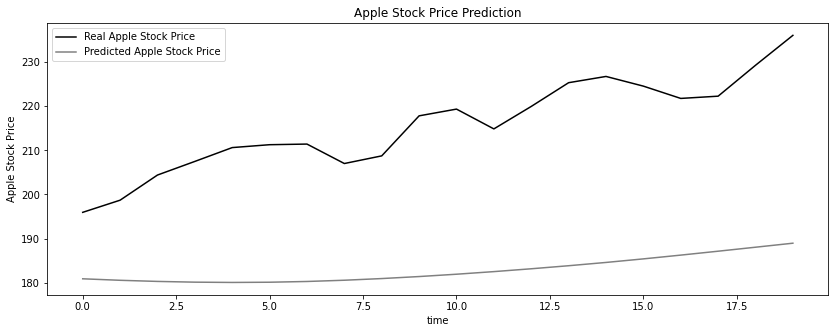

In [33]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'black', label = "Real Apple Stock Price")
plt.plot(y_pred, color = 'gray',\
         label = 'Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()